# Realized Volatility Models in the OpenBB SDK

The same, six, realized volatility models from the, *Getting Started With Python for Quant Finance*, course have been integrated with the OpenBB SDK, as of version 2.5. Each model is callable through its own function, as well an additional function for realized volatility quantiles of any asset with OHLC data. If you aren't already familiar with his work, Jason's newsletter provides usable, relavant, and practical code to your inbox every week. If you are new, to finance or to Python, the community Jason has built is a valuable resource for any type of user and his style of communication is highly effective. Check out the course [here](​https://gettingstartedwithpythonforquantfinance.com/?ref=ezyapsobd​). This notebook is a sample of what the course has to offer, applied through building in public.

To begin, import the OpenBB SDK as well as the Pandas library.

In [1]:
# Import statements

import pandas as pd
from openbb_terminal.sdk import openbb

%matplotlib inline

## End Points

The cones function is for the rolling quantiles, while the other functions return historical calculations over a specific window. The `cones` function applies a `for` loop over many windows, grouping the results into selectable quantiles.

`windows = [3, 10, 30, 60, 90, 120, 150, 180, 210, 240, 300, 360]`

`openbb.ta.cones()`

`openbb.ta.rvol_garman_klass()`

`openbb.ta.rvol_hodges_tompkins()`

`openbb.ta.rvol_parkinson()`

`openbb.ta_rvol_rogers_satchell()`

`openbb.ta.rvol_std()`

`openbb.ta.rvol_yang_zhang()`

## Collect Some Data

One of the primary steps for most workflows is to capture historical price data. The most robust method is to use the `load` function from the `stocks` module. 

In [2]:
# This will obtain daily price data for the complete history of SPY. The start date only needs to be before the first trading day of SPY, no end date is required to obtain the full history.

df = openbb.stocks.load("SPY", start_date = '1990-01-01')

Loading Daily data for SPY with starting period 1993-01-29.

## Function Inputs and Parameters

The primary input for each function is a Pandas DataFrame containing OHLC data. All other parameters have default settings which do not require additional user input. The `is_crypto` boolean provides an easy switch for the number of trading-days-per-year. 252 is the standard for equities and trad-fi, while `is_crypto = True` enforces 365.


In [3]:
openbb.ta.cones?

Signature:     
openbb.ta.cones(
    data: pandas.core.frame.DataFrame,
    lower_q: float = 0.25,
    upper_q: float = 0.75,
    is_crypto: bool = False,
    model: str = 'STD',
) -> pandas.core.frame.DataFrame
Call signature: openbb.ta.cones(*args: Any, **kwargs: Any) -> Any
Type:           cones
String form:    <openbb_terminal.common.technical_analysis.volatility_model.Operation object at 0x29ee8b1c0>
File:           ~/GitHub/OpenBBTerminal/openbb_terminal/common/technical_analysis/volatility_model.py
Docstring:     
Returns a DataFrame of realized volatility quantiles.

Parameters
---------
data: pd.DataFrame
    DataFrame of the OHLC data.
lower_q: float (default = 0.25)
    The lower quantile to calculate the realized volatility over time for.
upper_q: float (default = 0.75)
    The upper quantile to calculate the realized volatility over time for.
is_crypto: bool (default = False)
    If true, volatility is calculated for 365 days instead of 252.
model: str (default = "STD")
  

In [4]:
openbb.ta.rvol_parkinson?

Signature:     
openbb.ta.rvol_parkinson(
    data: pandas.core.frame.DataFrame,
    window: int = 30,
    trading_periods: Optional[int] = None,
    is_crypto: bool = False,
    clean=True,
) -> pandas.core.frame.DataFrame
Call signature: openbb.ta.rvol_parkinson(*args: Any, **kwargs: Any) -> Any
Type:           parkinson
String form:    <openbb_terminal.common.technical_analysis.volatility_model.Operation object at 0x107284280>
File:           ~/GitHub/OpenBBTerminal/openbb_terminal/common/technical_analysis/volatility_model.py
Docstring:     
Parkinson volatility uses the high and low price of the day rather than just close to close prices.
It is useful for capturing large price movements during the day.

Parameters
----------
data : pd.DataFrame
    Dataframe of OHLC prices.
window : int [default: 30]
    Length of window to calculate over.
trading_periods : Optional[int] [default: 252]
    Number of trading periods in a year.
is_crypto : bool [default: False]
    If true, trading_

## Sample Outputs

Let's take a look at what the expected outputs are. The data we have loaded already is the complete daily OHLC history of SPY. 

In [5]:
df.head(1)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
date,,,,,,,,
1993-01-29,25.140226,25.140226,25.015151,25.122358,25.122358,1003200,0.0,0.0


### Standard Deviation Model

This model requires a minimum window of two trading periods, the default is thirty. The calculations, by default, are annualized over 252 trading-days-per-year. To change this behaviour:

- `is_crypto = True` to annualize over 365 days.
- Enter an integer value for the `trading_periods` argument. 

In [6]:
openbb.ta.rvol_std(df, window = 1)

Error: Window must be at least 2, defaulting to 30.


date
1993-03-15    0.133722
1993-03-16    0.132503
1993-03-17    0.133975
1993-03-18    0.131751
1993-03-19    0.131354
                ...   
2023-03-20    0.167943
2023-03-21    0.172399
2023-03-22    0.173647
2023-03-23    0.171859
2023-03-24    0.171847
Name: Close, Length: 7563, dtype: float64

For each model there is an override for the `is_crypto` boolean that allows any period to be entered. A message will print indicating that 365 has been overridden. 

In [7]:
openbb.ta.rvol_std(df, trading_periods = 2, window = 365, is_crypto = True)

is_crypto is overridden by trading_periods.


date
1994-07-12    0.008657
1994-07-13    0.008643
1994-07-14    0.008677
1994-07-15    0.008643
1994-07-18    0.008638
                ...   
2023-03-20    0.019477
2023-03-21    0.019499
2023-03-22    0.019529
2023-03-23    0.019530
2023-03-24    0.019529
Name: Close, Length: 7228, dtype: float64

In [8]:
openbb.ta.rvol_std(df, window = 2)

date
1993-02-02    0.055789
1993-02-03    0.094274
1993-02-04    0.071170
1993-02-05    0.054669
1993-02-08    0.007805
                ...   
2023-03-20    0.239443
2023-03-21    0.039011
2023-03-22    0.339427
2023-03-23    0.223301
2023-03-24    0.043113
Name: Close, Length: 7591, dtype: float64

Notice the difference  in the output when the `is_crypto` argument is deployed.

In [9]:
openbb.ta.rvol_std(df, is_crypto = True, window = 2)

date
1993-02-02    0.067142
1993-02-03    0.113459
1993-02-04    0.085654
1993-02-05    0.065794
1993-02-08    0.009393
                ...   
2023-03-20    0.288170
2023-03-21    0.046950
2023-03-22    0.408500
2023-03-23    0.268742
2023-03-24    0.051887
Name: Close, Length: 7591, dtype: float64

In [10]:
openbb.ta.rvol_std(df, window = 10, is_crypto = False)

date
1993-02-12    0.090819
1993-02-16    0.157636
1993-02-17    0.156309
1993-02-18    0.140351
1993-02-19    0.139524
                ...   
2023-03-20    0.210911
2023-03-21    0.209704
2023-03-22    0.227502
2023-03-23    0.206348
2023-03-24    0.188904
Name: Close, Length: 7583, dtype: float64

In [11]:
openbb.ta.rvol_std(df, window = 10, is_crypto = True)

date
1993-02-12    0.109301
1993-02-16    0.189714
1993-02-17    0.188118
1993-02-18    0.168912
1993-02-19    0.167918
                ...   
2023-03-20    0.253831
2023-03-21    0.252379
2023-03-22    0.273799
2023-03-23    0.248340
2023-03-24    0.227346
Name: Close, Length: 7583, dtype: float64

The other models operate in exactly the same way. Let's examine the difference of output.

### Parkinson Model

Print the docstrings with: `help(openbb.ta.rvol_parkinson)`, or in a notebook: `openbb.ta.rvol_parkinson?`

In [12]:
openbb.ta.rvol_parkinson(df)

date
1993-03-12    0.100296
1993-03-15    0.100382
1993-03-16    0.099882
1993-03-17    0.099987
1993-03-18    0.098891
                ...   
2023-03-20    0.146168
2023-03-21    0.146502
2023-03-22    0.148752
2023-03-23    0.152654
2023-03-24    0.150787
Length: 7564, dtype: float64

In [13]:
openbb.ta.rvol_parkinson(df, is_crypto = True)

date
1993-03-12    0.120706
1993-03-15    0.120810
1993-03-16    0.120208
1993-03-17    0.120335
1993-03-18    0.119015
                ...   
2023-03-20    0.175913
2023-03-21    0.176315
2023-03-22    0.179023
2023-03-23    0.183719
2023-03-24    0.181472
Length: 7564, dtype: float64

### Hodges-Tompkins Model

Print the docstrings with: `help(openbb.ta.rvol_hodges_tompkins)`, or in a notebook: `openbb.ta.rvol_hodges_tompkins?`

In [14]:
openbb.ta.rvol_hodges_tompkins(df)

date
1993-03-15    0.134254
1993-03-16    0.133030
1993-03-17    0.134508
1993-03-18    0.132275
1993-03-19    0.131877
                ...   
2023-03-20    0.168611
2023-03-21    0.173084
2023-03-22    0.174338
2023-03-23    0.172542
2023-03-24    0.172531
Name: Close, Length: 7563, dtype: float64

In [15]:
openbb.ta.rvol_hodges_tompkins(df, is_crypto = True)

date
1993-03-15    0.161574
1993-03-16    0.160102
1993-03-17    0.161881
1993-03-18    0.159193
1993-03-19    0.158713
                ...   
2023-03-20    0.202923
2023-03-21    0.208307
2023-03-22    0.209815
2023-03-23    0.207654
2023-03-24    0.207641
Name: Close, Length: 7563, dtype: float64

### Garman-Klass Model

Print the docstrings with: `help(openbb.ta.rvol_garman_klass)`, or in a notebook: `openbb.ta.rvol_garman_klass?`


In [16]:
openbb.ta.rvol_garman_klass(df)

date
1993-03-12    0.090442
1993-03-15    0.090035
1993-03-16    0.089996
1993-03-17    0.089878
1993-03-18    0.089616
                ...   
2023-03-20    0.141478
2023-03-21    0.141754
2023-03-22    0.144462
2023-03-23    0.150135
2023-03-24    0.149885
Length: 7564, dtype: float64

In [17]:
openbb.ta.rvol_garman_klass(df, is_crypto = True)

date
1993-03-12    0.108847
1993-03-15    0.108357
1993-03-16    0.108310
1993-03-17    0.108169
1993-03-18    0.107853
                ...   
2023-03-20    0.170269
2023-03-21    0.170601
2023-03-22    0.173860
2023-03-23    0.180687
2023-03-24    0.180386
Length: 7564, dtype: float64

### Rogers-Satchell Model

Print the docstrings with: `help(openbb.ta.rvol_rogers_satchell)`, or in a notebook: `openbb.ta.rvol_rogers_satchell?`

In [18]:
openbb.ta.rvol_rogers_satchell(df)

date
1993-03-12    0.091722
1993-03-15    0.090740
1993-03-16    0.091090
1993-03-17    0.090891
1993-03-18    0.091437
                ...   
2023-03-20    0.137952
2023-03-21    0.138300
2023-03-22    0.142200
2023-03-23    0.148125
2023-03-24    0.148981
Length: 7564, dtype: float64

In [19]:
openbb.ta.rvol_rogers_satchell(df, is_crypto = True)

date
1993-03-12    0.110387
1993-03-15    0.109205
1993-03-16    0.109627
1993-03-17    0.109387
1993-03-18    0.110045
                ...   
2023-03-20    0.166026
2023-03-21    0.166445
2023-03-22    0.171138
2023-03-23    0.178268
2023-03-24    0.179298
Length: 7564, dtype: float64

### Yang Zhang Model

Print the docstrings with: `help(openbb.ta.rvol_yang_zhang)`, or in a notebook: `openbb.ta.rvol_yang_zhang?`

In [20]:
openbb.ta.rvol_yang_zhang(df)

date
1993-03-15    0.111298
1993-03-16    0.111256
1993-03-17    0.111355
1993-03-18    0.111951
1993-03-19    0.107311
                ...   
2023-03-20    0.183293
2023-03-21    0.184900
2023-03-22    0.187802
2023-03-23    0.192201
2023-03-24    0.191062
Length: 7563, dtype: float64

In [21]:
openbb.ta.rvol_yang_zhang(df, is_crypto = True)

date
1993-03-15    0.133947
1993-03-16    0.133896
1993-03-17    0.134015
1993-03-18    0.134733
1993-03-19    0.129149
                ...   
2023-03-20    0.220593
2023-03-21    0.222527
2023-03-22    0.226019
2023-03-23    0.231315
2023-03-24    0.229943
Length: 7563, dtype: float64

### Cones

This function generates the realized volatility quantiles and returns a DataFrame which can be used for plotting the cones. There are two functions, one is for returning the DataFrame only, the other is for returning a chart.

`openbb.ta.cones()`

`openbb.ta.cones_chart()`

For these functions, the lower and upper quantiles have been parameterized. Use the `lower_q` and `upper_q` arguments as a float between 0 and 1, representing the % value. The default model is "STD", `rvol_std`.

In [22]:
openbb.ta.cones(df)

,Realized,Min,Lower 25%,Median,Upper 75%,Max
3,0.067035,0.000014,0.064378,0.112227,0.186349,1.919684
10,0.090819,0.020061,0.088670,0.133494,0.194119,1.130632
30,0.133722,0.035121,0.100864,0.137058,0.199567,0.864873
60,0.120574,0.049786,0.107493,0.141347,0.200478,0.755842
90,0.114354,0.054998,0.110153,0.141838,0.202661,0.646355
120,0.108223,0.062658,0.110640,0.143496,0.206440,0.590355
150,0.100045,0.064545,0.111828,0.149835,0.205940,0.560031
180,0.096711,0.066184,0.111466,0.152025,0.208891,0.522603
210,0.094264,0.067329,0.112871,0.155769,0.212143,0.490693
240,0.091159,0.067542,0.113351,0.154641,0.217990,0.464773


In [23]:
openbb.ta.cones(df, lower_q = 0.05, upper_q = 0.95)

,Realized,Min,Lower 5%,Median,Upper 95%,Max
3,0.067035,0.000014,0.025242,0.112227,0.359354,1.919684
10,0.090819,0.020061,0.056347,0.133494,0.336652,1.130632
30,0.133722,0.035121,0.068493,0.137058,0.319039,0.864873
60,0.120574,0.049786,0.073069,0.141347,0.320950,0.755842
90,0.114354,0.054998,0.075930,0.141838,0.310726,0.646355
120,0.108223,0.062658,0.082539,0.143496,0.317000,0.590355
150,0.100045,0.064545,0.086224,0.149835,0.308140,0.560031
180,0.096711,0.066184,0.085952,0.152025,0.345717,0.522603
210,0.094264,0.067329,0.088792,0.155769,0.348506,0.490693
240,0.091159,0.067542,0.091389,0.154641,0.335625,0.464773


Sanity checks are in place to ensure that lower and upper are always labeled correctly.

In [24]:
openbb.ta.cones(df, lower_q = 0.95)

,Realized,Min,Lower 75%,Median,Upper 95%,Max
3,0.067035,0.000014,0.186349,0.112227,0.359354,1.919684
10,0.090819,0.020061,0.194119,0.133494,0.336652,1.130632
30,0.133722,0.035121,0.199567,0.137058,0.319039,0.864873
60,0.120574,0.049786,0.200478,0.141347,0.320950,0.755842
90,0.114354,0.054998,0.202661,0.141838,0.310726,0.646355
120,0.108223,0.062658,0.206440,0.143496,0.317000,0.590355
150,0.100045,0.064545,0.205940,0.149835,0.308140,0.560031
180,0.096711,0.066184,0.208891,0.152025,0.345717,0.522603
210,0.094264,0.067329,0.212143,0.155769,0.348506,0.490693
240,0.091159,0.067542,0.217990,0.154641,0.335625,0.464773


Use the `model` argument to select one of the other models.

In [25]:
openbb.ta.cones(df, model = 'Yang-Zhang')

,Realized,Min,Lower 25%,Median,Upper 75%,Max
3,0.206471,0.036251,0.157431,0.235300,0.357838,2.901300
10,0.156357,0.041592,0.151380,0.218403,0.316024,1.852406
30,0.209220,0.069355,0.159135,0.216393,0.310817,1.317697
60,0.181869,0.080218,0.166172,0.220665,0.313049,1.135740
90,0.172320,0.091529,0.170102,0.220902,0.316946,0.976417
120,0.161437,0.096184,0.170877,0.223088,0.326395,0.906004
150,0.150722,0.098014,0.174250,0.230409,0.330037,0.847694
180,0.148022,0.101195,0.174870,0.232754,0.329928,0.789501
210,0.145173,0.103580,0.176812,0.241827,0.333143,0.741163
240,0.140835,0.103184,0.178492,0.240964,0.338550,0.702874


In [26]:
openbb.ta.cones(df, model = 'Rogers-Satchell')

,Realized,Min,Lower 25%,Median,Upper 75%,Max
3,0.053685,0.015730,0.075357,0.108424,0.158737,1.103625
10,0.085904,0.031829,0.081197,0.115084,0.162327,0.903857
30,0.091722,0.037450,0.085711,0.119179,0.166582,0.738473
60,0.085163,0.047437,0.089570,0.123309,0.169933,0.628890
90,0.082095,0.051270,0.093227,0.127397,0.173304,0.560099
120,0.076862,0.053294,0.093943,0.129232,0.177705,0.523743
150,0.072831,0.053766,0.095099,0.131215,0.179658,0.487082
180,0.072897,0.056494,0.095333,0.130304,0.181622,0.453949
210,0.072318,0.057753,0.096198,0.131279,0.180789,0.426170
240,0.069716,0.058269,0.097472,0.132939,0.184689,0.403736


In [27]:
openbb.ta.cones(df, model = 'Garman-Klass')

,Realized,Min,Lower 25%,Median,Upper 75%,Max
3,0.049987,0.020195,0.076159,0.109634,0.159132,1.088747
10,0.077443,0.032200,0.081128,0.114336,0.163166,0.866488
30,0.090442,0.036694,0.085784,0.117524,0.166249,0.711636
60,0.083531,0.045660,0.089197,0.122267,0.170582,0.616402
90,0.080789,0.049871,0.092254,0.125077,0.174357,0.542882
120,0.075991,0.052002,0.093198,0.127285,0.178380,0.508204
150,0.072065,0.052709,0.094644,0.129424,0.179889,0.474018
180,0.071635,0.054395,0.094891,0.128702,0.178840,0.441896
210,0.071099,0.056442,0.095816,0.131258,0.181090,0.415168
240,0.068787,0.056761,0.096908,0.132303,0.181481,0.394028


### Chart the Realized Volatility Cones

Apply the same syntax to, `openbb.ta.cones_chart()`, to visualize the output.

In [28]:
openbb.ta.cones_chart(df)

In [29]:
openbb.ta.cones_chart(df, model = 'Garman-Klass')

The `data` input can also be the `load` function from the OpenBB SDK. Use the `symbol` argument to add the name of the security to the title. Notice that the values shift with the amount of historical data being fed to the model.

In [30]:
openbb.ta.cones_chart(
    data = openbb.stocks.load('SPY'),
    symbol = 'SPY',
    model = 'Garman-Klass',
)

Loading Daily data for SPY with starting period 2020-03-23.

In [39]:
openbb.ta.cones_chart(
    data = openbb.stocks.load('VOO'),
    symbol = 'VOO',
    model = 'Garman-Klass',    
)

Loading Daily data for VOO with starting period 2020-03-23.

## Advanced Use

A chart or a table is nice and all, but what are we supposed to do with it? Becoming a Script-Kitty can start with simply being curious. Curiousity runs hot with motivation, keep those burning questions in mind to begin down the path towards answering them. Here's a really basic example of what curiousity can look like: 

### How can I compare the difference between all models within one table?

In [32]:
# Get some data - TLT is the iShares 20 Plus Year Treasury Bond ETF. 

data = openbb.stocks.load('TLT', start_date = '2000-01-01')

Loading Daily data for TLT with starting period 2002-07-30.

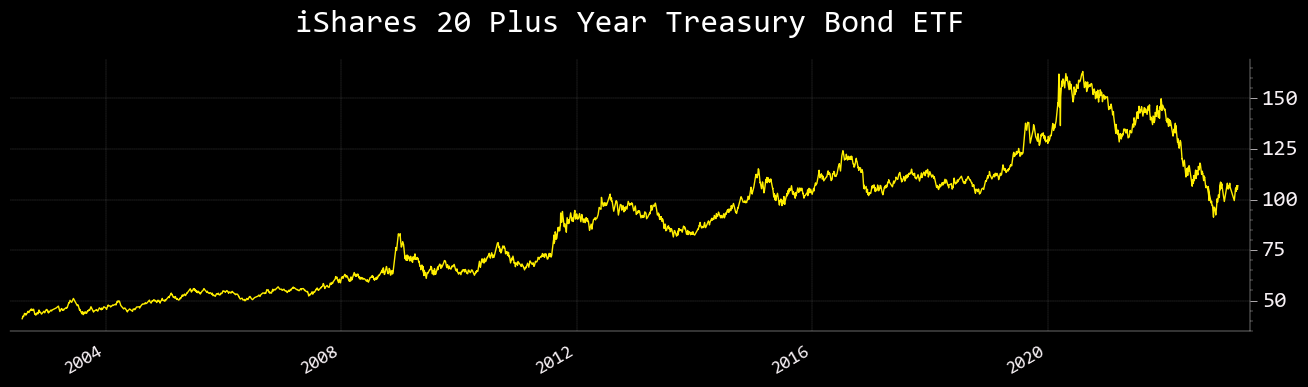

In [33]:
# Visualize the data, if desired.

data['Adj Close'].plot(figsize = [16, 4], title = 'iShares 20 Plus Year Treasury Bond ETF', xlabel = '');

In [34]:
# Create a Pandas DataFrame and then assign columns to each model.

results = pd.DataFrame()

results['Standard Deviation'] = openbb.ta.rvol_std(data, window = 2)
results['Parkinson'] = openbb.ta.rvol_parkinson(data, window = 2)
results['Hodges-Tompkins'] = openbb.ta.rvol_hodges_tompkins(data, window = 2)
results['Garman-Klass'] = openbb.ta.rvol_garman_klass(data, window = 2)
results['Rogers-Satchell'] = openbb.ta.rvol_rogers_satchell(data, window = 2)
results['Yang-Zhang'] = openbb.ta.rvol_yang_zhang(data, window = 2)

results

,Standard Deviation,Parkinson,Hodges-Tompkins,Garman-Klass,Rogers-Satchell,Yang-Zhang
date,,,,,,
2002-08-01,0.074450,0.083403,0.074479,0.075624,0.070795,0.140866
2002-08-02,0.050610,0.105981,0.050630,0.103655,0.096629,0.144345
2002-08-05,0.064949,0.109263,0.064974,0.114035,0.109442,0.163508
2002-08-06,0.145792,0.072415,0.145848,0.078072,0.079528,0.138409
2002-08-07,0.123239,0.083376,0.123286,0.092822,0.096105,0.152727
...,...,...,...,...,...,...
2023-03-20,0.266411,0.112118,0.266514,0.114933,0.120969,0.275068
2023-03-21,0.002322,0.096812,0.002323,0.094442,0.088736,0.182058
2023-03-22,0.245542,0.140382,0.245636,0.118570,0.102022,0.205839


The "problem" has been solved; achieving a sense of accomplishment is important for maintaining the motivation required to keep driving forward. Breaking large workflows down to a series of smaller items will make them easier to manage, make the undertaking seem less overwhelming, and provide the satisfaction associated with completing a task or chore.

With the question answered, what is the next task? 

### How do I parametize this table so that it can be called as a one-liner function, sporting a variable ticker input?

The first step is to wrap the DataFrame above in a function, with the input parameters of the function corresponding to those belonging to the individual model one-liners.

In [35]:
from typing import Optional

def rvol(
    data: pd.DataFrame, 
    window:int = 2,
    trading_periods: Optional[int] = None,
    is_crypto: bool = False
)-> pd.DataFrame:
    
    results = pd.DataFrame()

    results['Standard Deviation'] = openbb.ta.rvol_std(data, window, trading_periods, is_crypto)
    results['Parkinson'] = openbb.ta.rvol_parkinson(data, window, trading_periods, is_crypto)
    results['Hodges-Tompkins'] = openbb.ta.rvol_hodges_tompkins(data, window, trading_periods, is_crypto)
    results['Garman-Klass'] = openbb.ta.rvol_garman_klass(data, window, trading_periods, is_crypto)
    results['Rogers-Satchell'] = openbb.ta.rvol_rogers_satchell(data, window, trading_periods, is_crypto)
    results['Yang-Zhang'] = openbb.ta.rvol_yang_zhang(data, window, trading_periods, is_crypto)
    
    return results

rvol(data)

,Standard Deviation,Parkinson,Hodges-Tompkins,Garman-Klass,Rogers-Satchell,Yang-Zhang
date,,,,,,
2002-08-01,0.074450,0.083403,0.074479,0.075624,0.070795,0.140866
2002-08-02,0.050610,0.105981,0.050630,0.103655,0.096629,0.144345
2002-08-05,0.064949,0.109263,0.064974,0.114035,0.109442,0.163508
2002-08-06,0.145792,0.072415,0.145848,0.078072,0.079528,0.138409
2002-08-07,0.123239,0.083376,0.123286,0.092822,0.096105,0.152727
...,...,...,...,...,...,...
2023-03-20,0.266411,0.112118,0.266514,0.114933,0.120969,0.275068
2023-03-21,0.002322,0.096812,0.002323,0.094442,0.088736,0.182058
2023-03-22,0.245542,0.140382,0.245636,0.118570,0.102022,0.205839


Then, because the `data` argument will accept a function as an input, the `load` function can be passed through, instead of a Pandas DataFrame. First, setup the parameters as a separate block.

In [40]:
symbol = 'SPY'
window = 2
trading_periods = 252
is_crypto: bool = False

Now make the function to wrap both the `load` and `rvol` together.

In [41]:
def realized_vol(symbol) -> pd.DataFrame:
    data = openbb.stocks.load(f"{symbol}")
    
    rvol_df = rvol(data, window, trading_periods, is_crypto)
    
    return rvol_df
    
rvol_df = realized_vol(symbol)

rvol_df

Loading Daily data for SPY with starting period 2020-03-23.

,Standard Deviation,Parkinson,Hodges-Tompkins,Garman-Klass,Rogers-Satchell,Yang-Zhang
date,,,,,,
2020-03-25,0.806760,0.536792,0.808899,0.575684,0.573954,1.186099
2020-03-26,0.470209,0.578724,0.471456,0.599556,0.589638,0.867080
2020-03-27,0.976426,0.444240,0.979014,0.414370,0.409739,0.813094
2020-03-30,0.698166,0.346705,0.700017,0.375323,0.400335,0.770314
2020-03-31,0.527312,0.296892,0.528710,0.301194,0.291094,0.453230
...,...,...,...,...,...,...
2023-03-20,0.239443,0.122952,0.240078,0.122112,0.114896,0.181847
2023-03-21,0.039011,0.095852,0.039114,0.095635,0.093113,0.204867
2023-03-22,0.339427,0.188376,0.340326,0.186262,0.190783,0.309962


In [42]:
realized_vol('AAPL')

Loading Daily data for AAPL with starting period 2020-03-23.

,Standard Deviation,Parkinson,Hodges-Tompkins,Garman-Klass,Rogers-Satchell,Yang-Zhang
date,,,,,,
2020-03-25,1.135181,0.529624,1.138190,0.524343,0.530169,1.201295
2020-03-26,0.637681,0.498351,0.639372,0.462749,0.462187,0.715136
2020-03-27,1.050309,0.405136,1.053093,0.315437,0.259765,0.583667
2020-03-30,0.790484,0.287453,0.792580,0.287087,0.281142,0.598359
2020-03-31,0.338780,0.319840,0.339678,0.357646,0.379008,0.565177
...,...,...,...,...,...,...
2023-03-20,0.233862,0.191133,0.234482,0.193575,0.185165,0.262775
2023-03-21,0.039196,0.200140,0.039300,0.192981,0.183465,0.263828
2023-03-22,0.235932,0.219532,0.236557,0.234875,0.268794,0.371057


Thanks for reading, and if you want more actionable code snippets and notebooks, check out what else, *Getting Started with Python for Quant Finance*, has to [offer!](​https://gettingstartedwithpythonforquantfinance.com/?ref=ezyapsobd​) 